In [35]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests, os, sys
from io import StringIO
import pyspark
from pyspark.sql.functions import col

warnings.filterwarnings('ignore')

%pylab inline
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


In [20]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [21]:
path = 'data/external/BitcoinHeistData.csv'
    
# first line of file
! head -n 5 {fullpath}

In [23]:
# read.csv is very similar to the Pandas version
df = spark.read.csv(path,
                     sep=',',
                     inferSchema=True,
                     header=True)



df.printSchema()

root
 |-- address: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- length: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- count: integer (nullable = true)
 |-- looped: integer (nullable = true)
 |-- neighbors: integer (nullable = true)
 |-- income: decimal(14,0) (nullable = true)
 |-- ransomware: string (nullable = true)



In [10]:
pd.DataFrame(df.take(5), columns=df.columns)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000,princetonLocky


In [11]:
data.registerTempTable('df')

In [18]:
ransomware_types = spark.sql(r"""SELECT distinct label
                            FROM df""")
ransomware_types.show(100)

+--------------------+
|               label|
+--------------------+
|         paduaJigsaw|
| montrealXLockerv5.0|
|      montrealJigSaw|
|montrealCryptoTor...|
|   montrealXTPLocker|
|         montrealAPT|
|        montrealRazy|
|               white|
|   montrealNoobCrypt|
|     princetonCerber|
|        montrealEDA2|
|     paduaCryptoWall|
|montrealGlobeImpo...|
|montrealCryptConsole|
|      montrealSamSam|
|         montrealSam|
| montrealDMALockerv3|
|     montrealXLocker|
| montrealVenusLocker|
|montrealCryptoLocker|
|       montrealGlobe|
|      montrealFlyper|
|   montrealDMALocker|
|      princetonLocky|
|    montrealCryptXXX|
|       paduaKeRanger|
|    montrealWannaCry|
|montrealComradeCi...|
|     montrealGlobev3|
+--------------------+



In [41]:
ransomware_types.select("label").collect()[0].label

'paduaJigsaw'

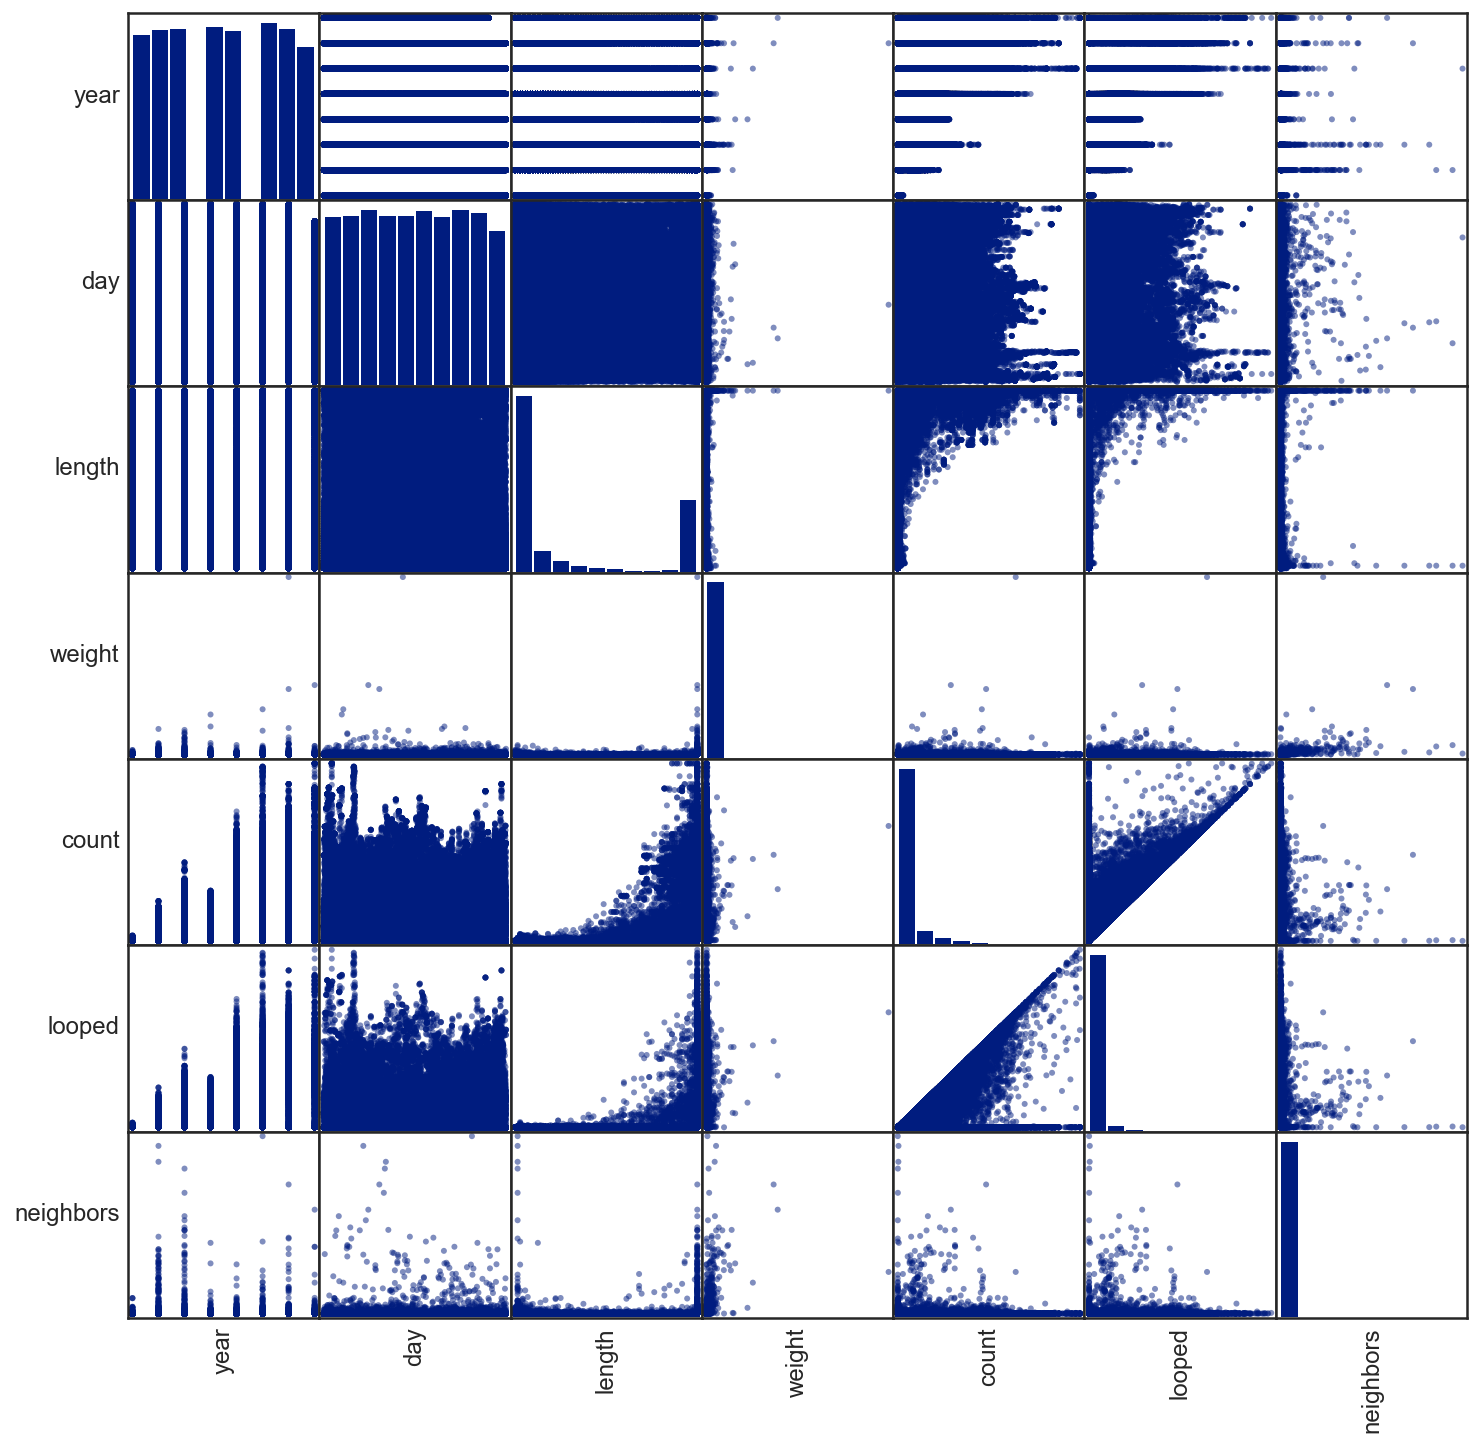

In [17]:
from pandas.plotting import scatter_matrix

sns.set_palette('dark')
sns.set_context('notebook')
sns.set_style('white')

# get the names of columns that are integers or doubles
numeric_features = [t[0] for t in df.dtypes if t[1] in ['int', 'double']]

# sample 10% of this data and convert to a Pandas dataframe
sampled_data = df.select(numeric_features).sample(False, 0.1).toPandas()

# make the scatter plot
axs = scatter_matrix(sampled_data, figsize=(12, 12));

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())